# Product Detection (Shopee Code League 2020)

In [9]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.plotting.register_matplotlib_converters()
import cv2 
import seaborn as sns
%matplotlib inline

print(tf.__version__)
ds_path = "./data/train/train"

2.0.0


## Data Exploration

### Read dataset and images

In [10]:
d_train = pd.read_csv("./data/train.csv")

In [11]:
d_train.shape

(105392, 2)

In [12]:
d_train.columns

Index(['filename', 'category'], dtype='object')

In [13]:
category = d_train.category.unique()
category

array([ 3,  4, 32, 35, 34, 33,  5,  2, 20, 18, 27, 11, 29, 16, 28, 17, 10,
       19, 26, 21,  7, 38,  0, 36,  9, 31, 30, 37,  8,  1,  6, 39, 41, 24,
       23, 15, 12, 40, 13, 14, 22, 25])

In [14]:
d_show = d_train.groupby("category", as_index=False).apply(lambda o: o.iloc[0, :])

In [15]:
len(d_show)

42

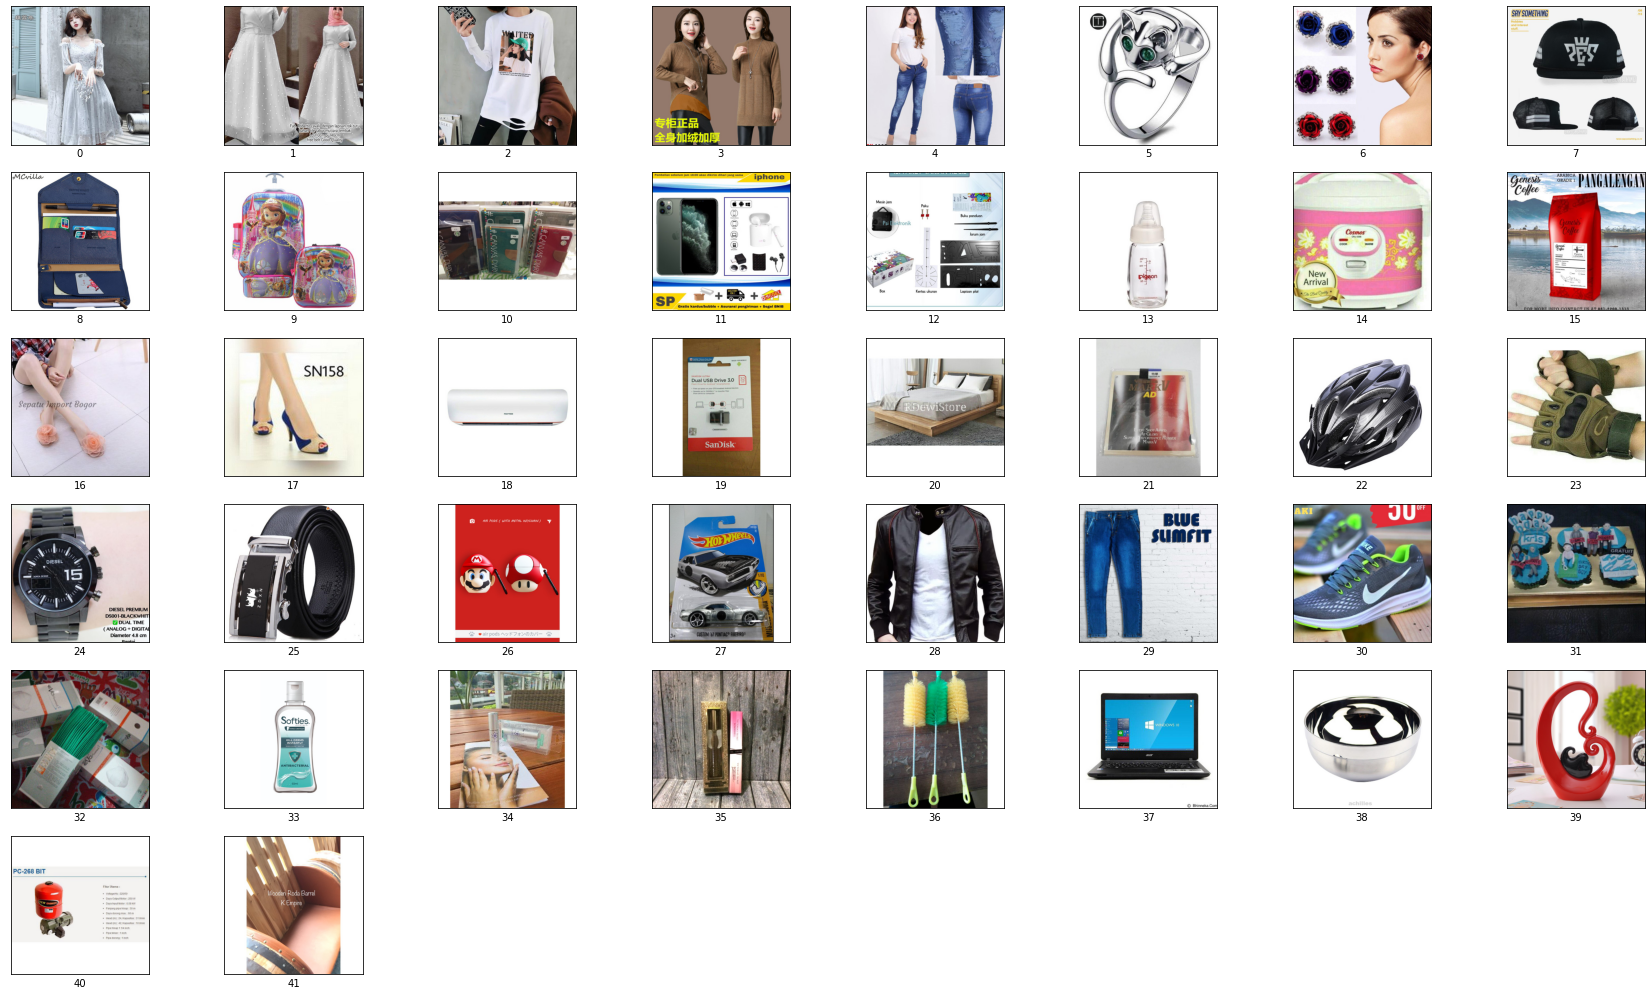

In [16]:
plt.figure(figsize=(30,30))
for i in range(len(d_show)):
    r = d_show.iloc[i]
    plt.subplot(10,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
  
    path = "%s/%02d/%s" % (ds_path, r.category, r.filename)
    plt.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
    plt.xlabel(r.category)
plt.show()

In [17]:
d_d = d_train.groupby("category", as_index=False).apply(lambda o: o.iloc[0, :])

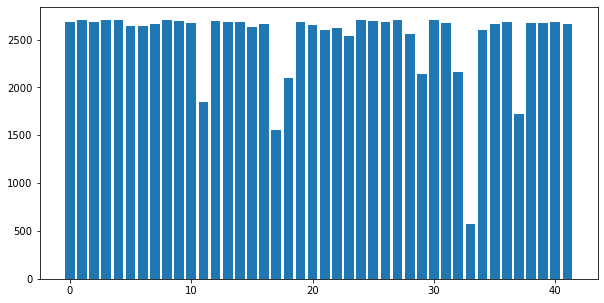

In [18]:
plt.figure(figsize=(10,5))
plt.bar(d_d.category, d_d.filename)
plt.show()

## Analyze and build Model

Select 200 images each category

In [53]:
CLASSIFICATION_SIZE = 500

d_reduced = d_train.groupby("category", as_index=False).apply(lambda o: o.sample(n=CLASSIFICATION_SIZE, random_state=1))

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

Read images, resize to 200x200

In [55]:
X = []
y = []
img_size = (200, 200)

i = 0
while i < len(d_reduced):
    r = d_reduced.iloc[i]
    path = "%s/%02d/%s" % (ds_path, r.category, r.filename)
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, img_size)
    X.append(img)
    y.append(r.category)
    i += 1

X = np.array(X)
y = np.array(y)

Create train, test

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Visualize

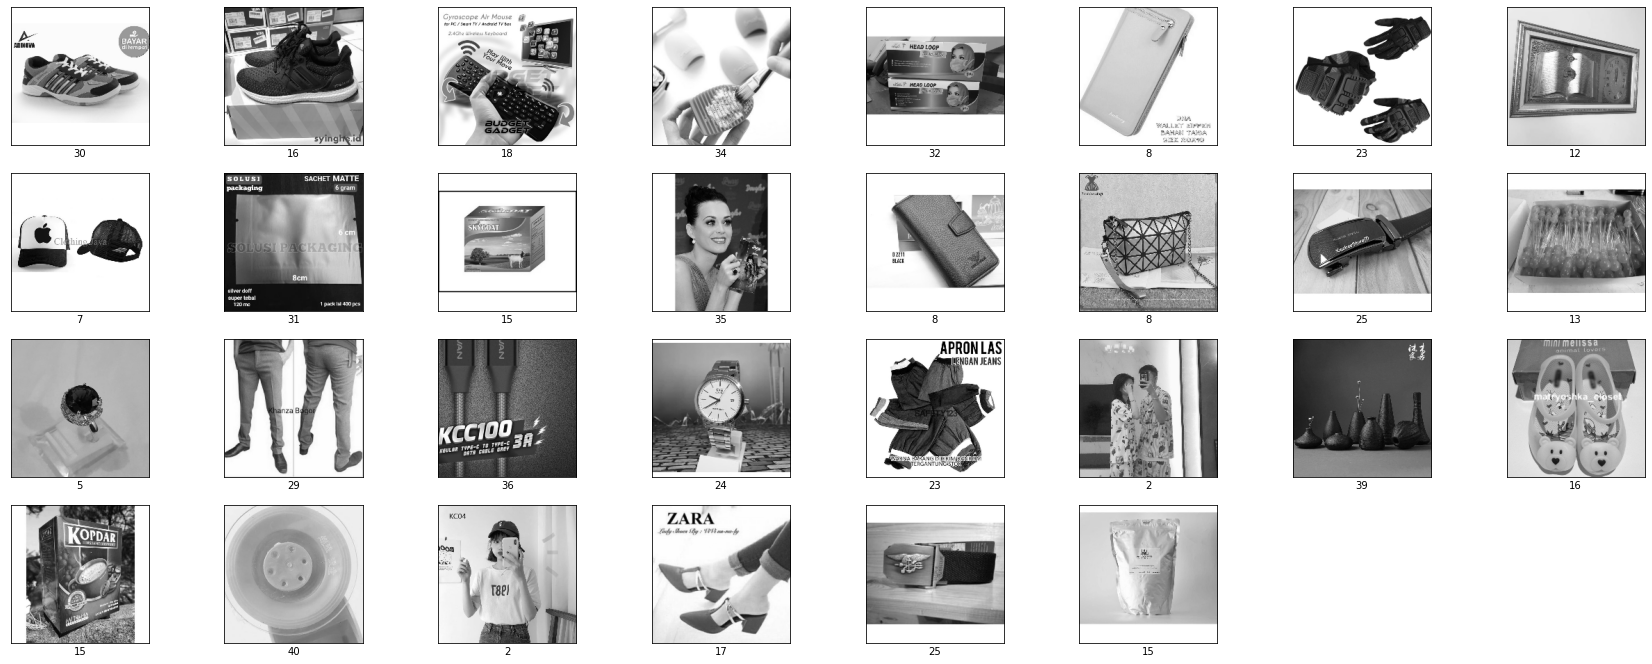

In [57]:
plt.figure(figsize=(30,30))
for i in range(30):
    plt.subplot(10,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(X_train[i], cv2.COLOR_GRAY2RGB))
    plt.xlabel(y_train[i])
plt.show()

Create layer for NN

In [58]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=img_size),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(category), activation='softmax')
])

In [59]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train model

In [60]:
model.fit(X_train, y_train, epochs=10)

Train on 16800 samples
Epoch 1/10
16800/16800 [==============================] - 57s 3ms/sample - loss: 219.4538 - accuracy: 0.0210
Epoch 2/10
16800/16800 [==============================] - 58s 3ms/sample - loss: 3.7379 - accuracy: 0.0232
Epoch 3/10
16800/16800 [==============================] - 58s 3ms/sample - loss: 3.7379 - accuracy: 0.0242
Epoch 4/10
16800/16800 [==============================] - 68s 4ms/sample - loss: 3.7378 - accuracy: 0.0240
Epoch 5/10
16800/16800 [==============================] - 50s 3ms/sample - loss: 3.7378 - accuracy: 0.0251
Epoch 6/10
16800/16800 [==============================] - 50s 3ms/sample - loss: 3.7378 - accuracy: 0.0241
Epoch 7/10
16800/16800 [==============================] - 55s 3ms/sample - loss: 3.7379 - accuracy: 0.0233
Epoch 8/10
16800/16800 [==============================] - 65s 4ms/sample - loss: 3.7379 - accuracy: 0.0236
Epoch 9/10
16800/16800 [==============================] - 92s 5ms/sample - loss: 3.7379 - accuracy: 0.0237
Epoch 10/10


Test with validation set

In [52]:
model.evaluate(X_test,  y_test, verbose=2)

1680/1 - 1s - loss: 3.7392 - accuracy: 0.0149


[3.742384910583496, 0.014880952]